### The purpose of this notebook is to get a very rough estimate of the magnetic field path length of the quasar through the cluster, with many assumptions and simplifications

In [67]:
import numpy as np

from astropy.table import Table # data stuffs

from scipy.integrate import quad # for integrating

import astropy.units as u # units for conversion and stuff
import matplotlib.pyplot as plt # plots

# Load Data from Flux Comparision notebook

In [68]:
quasars_matched = Table.read("../Products/Tables/QCP_matches_reduced.csv")
print(f"{len(quasars_matched)} Quasars-Cluster pairs with reasonable flux values etc")
quasars_matched[:3]

44 Quasars-Cluster pairs with reasonable flux values etc


IAUNAME,UID,RA,DEC,RADEC_ERR,EXT,ML_FLUX_1,ML_RATE_1,QUAIA_source_id,QUAIA_redshift,QUAIA_redshift_err,CLUSTER_NAME,SEPARATION,CLUSTER_Z,CLUSTER_FLUX,CLUSTER_R500,SEPARATION_R
str23,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str23,float64,float64,float64,float64,float64
1eRASS J034542.8-512950,105814100004,56.428536351919384,-51.49737416405309,0.8932768702507019,0.0,1.2494709043450736e-12,1.341931700706482,4829294973181982976,0.396,0.07660170276641848,1eRASS J034542.1-513042,0.014563502373970234,0.1939,2.4678e-13,891.0,174.39308805364402
1eRASS J043829.2-614758,107315300001,69.62171465309667,-61.79967048220355,0.3404570519924164,0.0,4.316204078175234e-12,4.635602951049805,4677239112130585984,1.927,0.7133141228485108,1eRASS J043838.1-615107,0.055282362612759095,0.0659,2.3504000000000003e-13,598.0,260.20071499975273
1eRASS J045957.6-611510,107715000001,74.99019789325905,-61.25294175144008,0.35830843448638916,0.0,2.8914154057146924e-12,3.105380058288574,4761465310590509056,0.16512604357212446,0.09792351691246033,1eRASS J045949.0-611349,0.028276261080173008,0.093,5.5426e-13,798.0,181.95463926000983


# Calculate Path Length
Loop through Quasar-Cluster Pairs (QCPs) and calculate the estimated path length.<br>

This involve the integral
$$ L = \int^\frac{\pi}{2}_0 \left(1 + \frac{R}{R_0 \cos \theta}\right)^{-1.5}  \frac{R}{\cos^2\theta} \;d\theta$$

Where $R$ is the separation of the Quasar from the Cluster, and $R_0$ will be the $\frac{R_{500}}{20}$ value of the cluster <br>
I will then normalize them so that the QCP with maximum and best path length is 1

In [69]:
def path_length_integrand(theta, R, R_0):
    return (R/np.power(np.cos(theta),2))*np.power(1+(R/(R_0 * np.cos(theta))), -1.5)
    
quasars_matched["PATH_LEN"] = np.zeros(len(quasars_matched))
for quasar in quasars_matched:
    integrand = lambda theta : path_length_integrand(theta, quasar["SEPARATION_R"], quasar["CLUSTER_R500"]/20)
    # integrand = lambda theta : path_length_integrand(theta, quasar["SEPARATION_R"], 300)
    quasar["PATH_LEN"] = quad(integrand, 0, np.pi/2)[0]


# quasars_matched["PATH_LEN"] = quasars_matched["PATH_LEN"]/max(quasars_matched["PATH_LEN"])
quasars_matched

IAUNAME,UID,RA,DEC,RADEC_ERR,EXT,ML_FLUX_1,ML_RATE_1,QUAIA_source_id,QUAIA_redshift,QUAIA_redshift_err,CLUSTER_NAME,SEPARATION,CLUSTER_Z,CLUSTER_FLUX,CLUSTER_R500,SEPARATION_R,PATH_LEN
str23,int64,float64,float64,float64,float64,float64,float64,int64,float64,float64,str23,float64,float64,float64,float64,float64,float64
1eRASS J034542.8-512950,105814100004,56.428536351919384,-51.49737416405309,0.8932768702507019,0.0,1.2494709043450736e-12,1.341931700706482,4829294973181982976,0.396,0.07660170276641848,1eRASS J034542.1-513042,0.014563502373970234,0.1939,2.4678e-13,891.0,174.39308805364402,50.63815570777611
1eRASS J043829.2-614758,107315300001,69.62171465309667,-61.79967048220355,0.3404570519924164,0.0,4.316204078175234e-12,4.635602951049805,4677239112130585984,1.927,0.7133141228485108,1eRASS J043838.1-615107,0.055282362612759095,0.0659,2.3504000000000003e-13,598.0,260.20071499975273,24.68068347690121
1eRASS J045957.6-611510,107715000001,74.99019789325905,-61.25294175144008,0.35830843448638916,0.0,2.8914154057146924e-12,3.105380058288574,4761465310590509056,0.16512604357212446,0.09792351691246033,1eRASS J045949.0-611349,0.028276261080173008,0.093,5.5426e-13,798.0,181.95463926000983,42.84502775012549
1eRASS J051621.0-103341,107810200002,79.08789664207139,-10.561521945751187,0.6047040820121765,0.0,3.5063143794672458e-12,3.7657816410064697,2990073016486189056,0.3115370273590088,0.16922684105873104,1eRASS J051626.6-103259,0.025458278986997852,0.1155,7.309000000000001e-14,597.0,198.24560383386685,27.612583296818347
1eRASS J060241.8-595152,108915000003,90.67454848061813,-59.86446695258894,0.7766640782356262,0.0,5.784297736968758e-13,0.6212335824966431,5494423607324927872,0.1011425331234932,0.05274107449054718,1eRASS J060232.1-595106,0.02398260881687685,0.0947,3.1304e-13,719.0,156.83681151563093,39.25525927249191
1eRASS J062307.4-643619,109315600002,95.78120338450204,-64.6054644793165,0.8028334975242615,0.0,3.175580891995322e-12,3.410573720932007,5476948725428677376,0.16680968912865757,0.14097615360975266,1eRASS J062238.2-643200,0.0889746292682517,0.0432,1.6035e-13,473.0,282.04050370109724,16.99794932258604
1eRASS J234931.6-363458,135812600026,357.38179902077394,-36.58289509104878,2.9871714115142822,0.0,2.147584004076955e-13,0.23065051436424255,2310821636519890432,0.5941154360771179,0.12225273481365201,1eRASS J234950.8-363449,0.06432233043857426,0.0456,6.855000000000001e-14,322.0,214.605253835957,11.006117831554791
1eRASS J023010.7-141748,103810500065,37.54469911739319,-14.296729798518534,2.7968251705169678,0.0,1.4456018576202573e-13,0.15525764226913452,5146274760900681344,1.8980954885482788,0.4301327623748781,1eRASS J023027.9-141831,0.07056602419214664,0.0553,4.1423e-13,598.0,282.2351220697467,23.82738399946892
1eRASS J025357.6-524617,104214400047,43.490325746325176,-52.771517408986256,2.303354024887085,0.0,1.9837899226972378e-13,0.21305903792381287,4747167188367506560,1.2826241254806519,0.16702477931976312,1eRASS J025349.0-524830,0.043006749747826326,0.0568,5.2140000000000006e-14,328.0,176.36045795229754,12.342426249579423


Plot how path length varies with separation

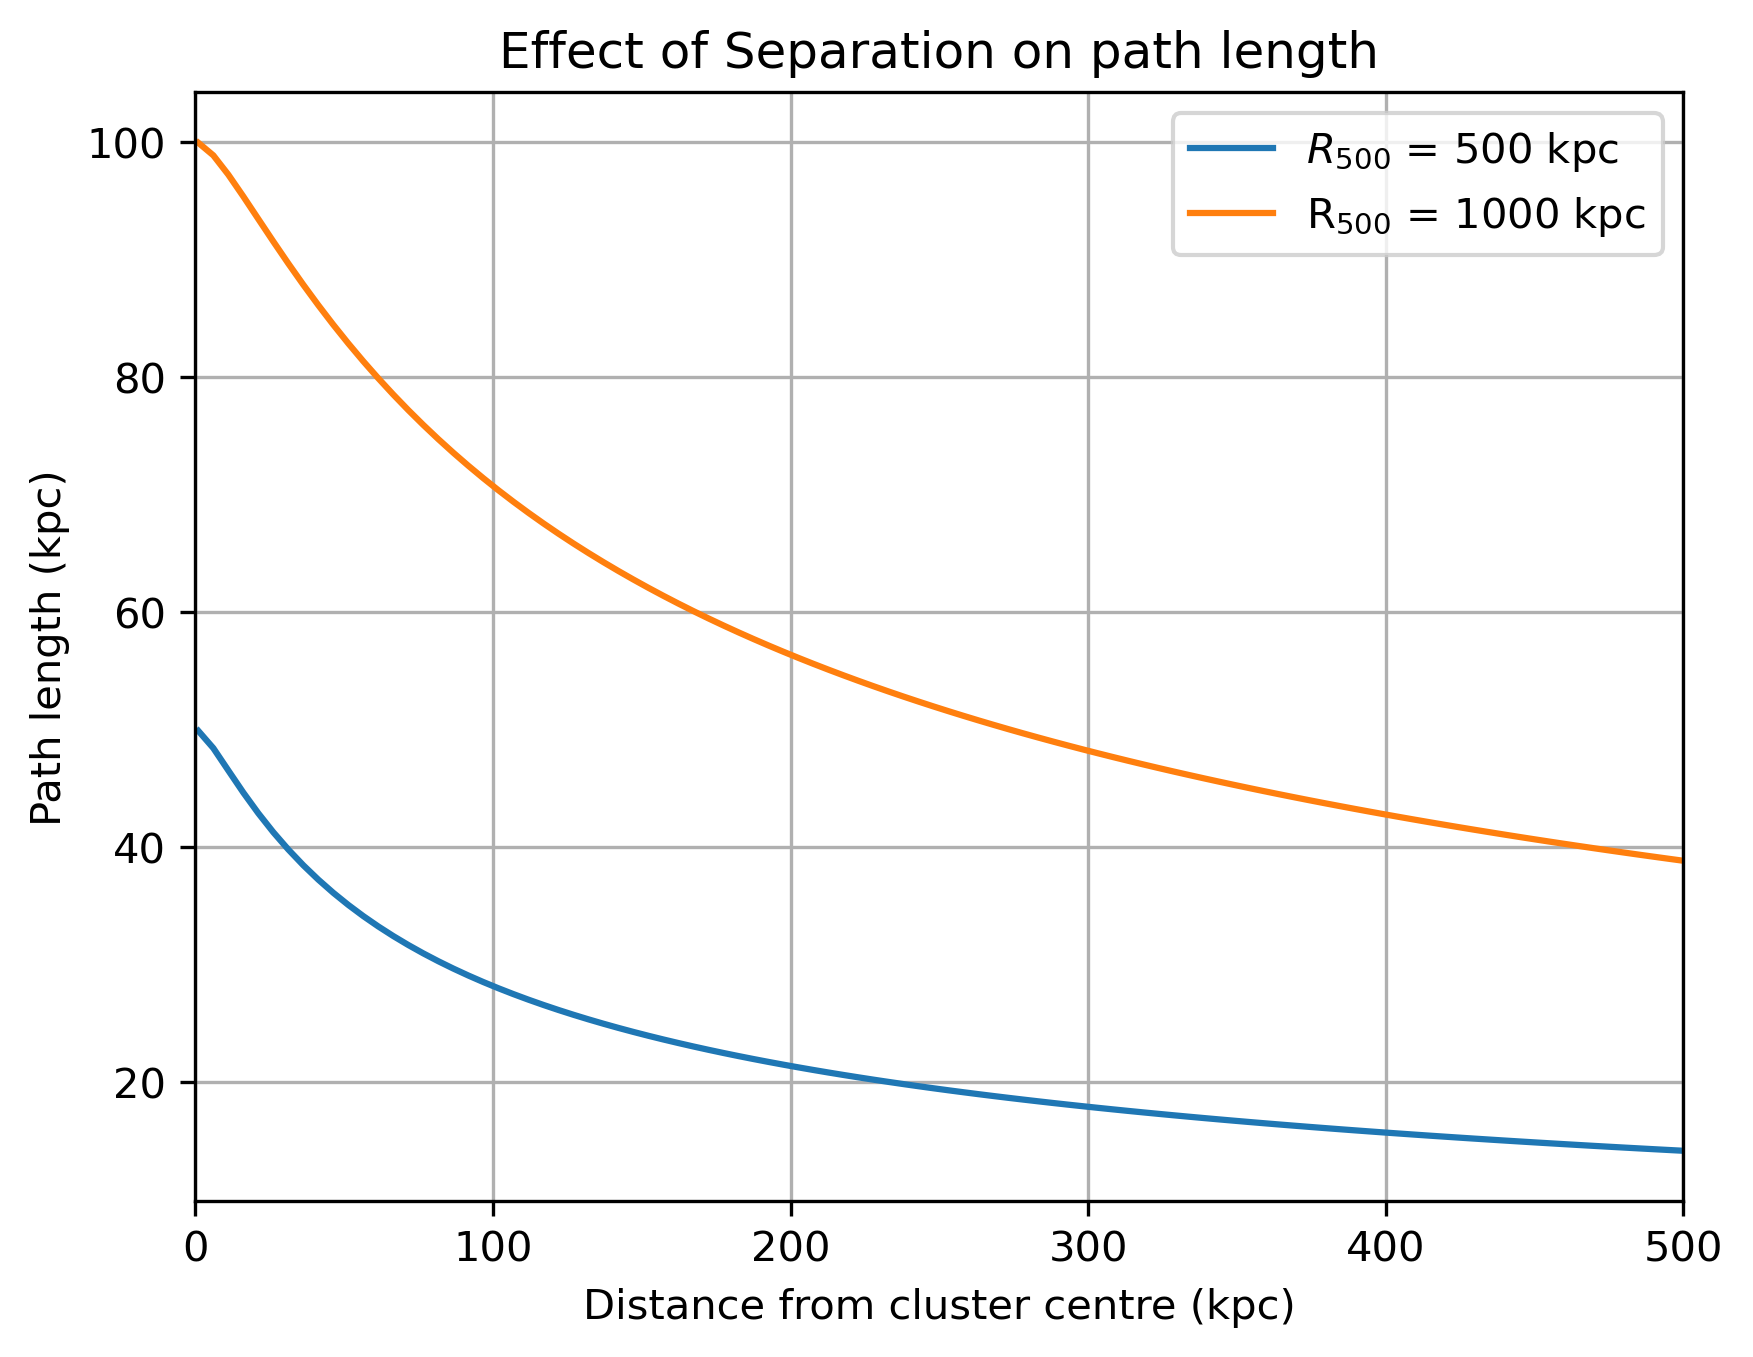

In [70]:
x = np.linspace(1, 500, 100)
y = np.array([quad(path_length_integrand, 0, np.pi/2, args=(r, 25))[0] for r in x])
y2 = np.array([quad(path_length_integrand, 0, np.pi/2, args=(r, 50))[0] for r in x])

plt.figure(dpi=300)

plt.plot(x, y, label="$R_{500}$ = 500 kpc")
plt.plot(x, y2, label="R$_{500}$ = 1000 kpc")

plt.title("Effect of Separation on path length")
plt.ylabel("Path length (kpc)")
plt.xlabel("Distance from cluster centre (kpc)")

plt.legend()
plt.grid()
plt.xlim(0, 500)

plt.show()


Compare beta model to the bending power law model used in Sisk-Reynes paper for H1821

49.67294132889134
49.99999999998702


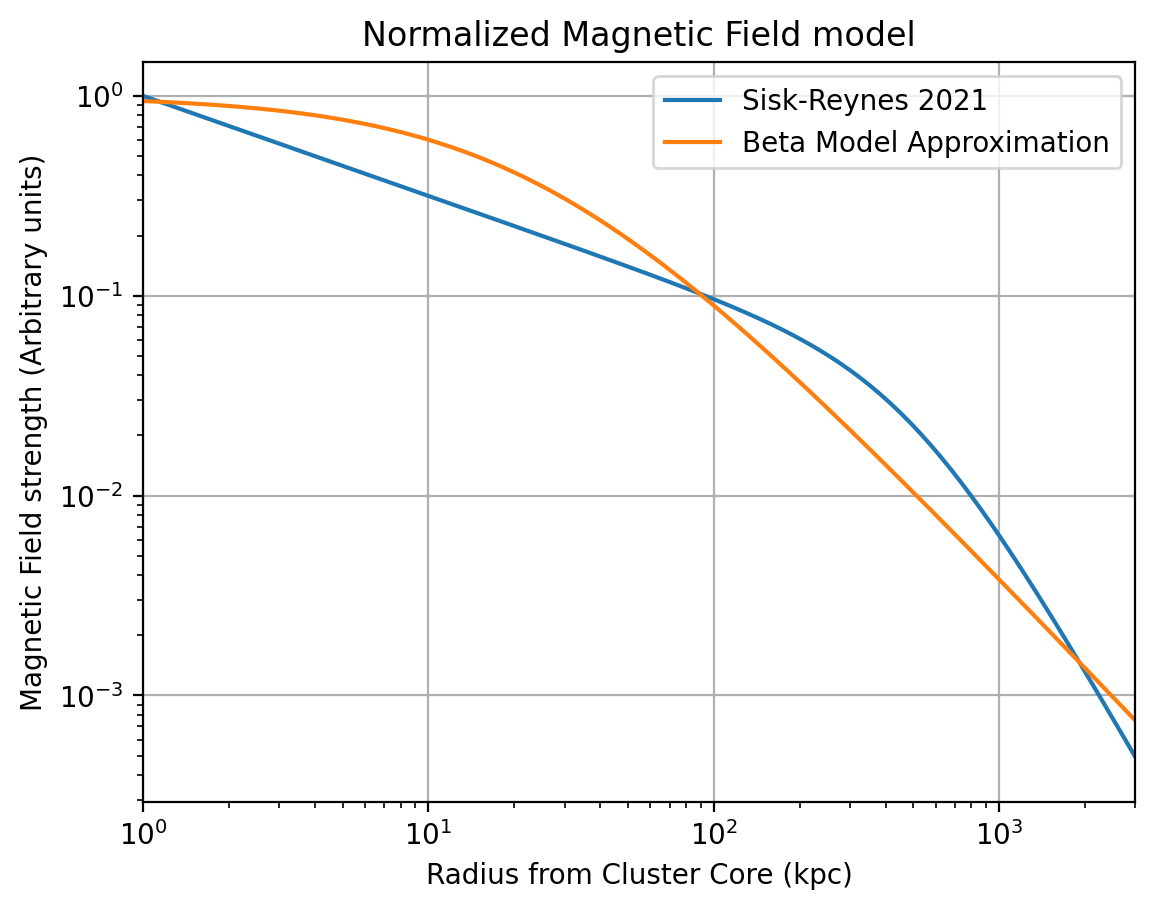

In [71]:
def test_integrand(r):
    return np.power(r, -0.5)/(1+np.power(r/500, 2))

def test_beta_integrand(r):
    return np.power(1 + (r/25), -1.5)

example_path_length = quad(test_integrand, 0, np.inf)[0]
example_beta_path_length = quad(test_beta_integrand, 0, np.inf)[0]

print(example_path_length)
print(example_beta_path_length)

x_vals = np.logspace(0, 3.5, 200)
y_vals = test_integrand(x_vals)

y_beta_vals = test_beta_integrand(x_vals)

plt.figure(dpi=200)

plt.plot(x_vals, y_vals, label="Sisk-Reynes 2021")
plt.plot(x_vals, y_beta_vals, label="Beta Model Approximation")

plt.loglog()
plt.xlim(1, 3000)
plt.grid()

plt.title("Normalized Magnetic Field model")
plt.ylabel("Magnetic Field strength (Arbitrary units)")
plt.xlabel("Radius from Cluster Core (kpc)")
plt.legend()

plt.show()


### Going to plot them to try and visualise

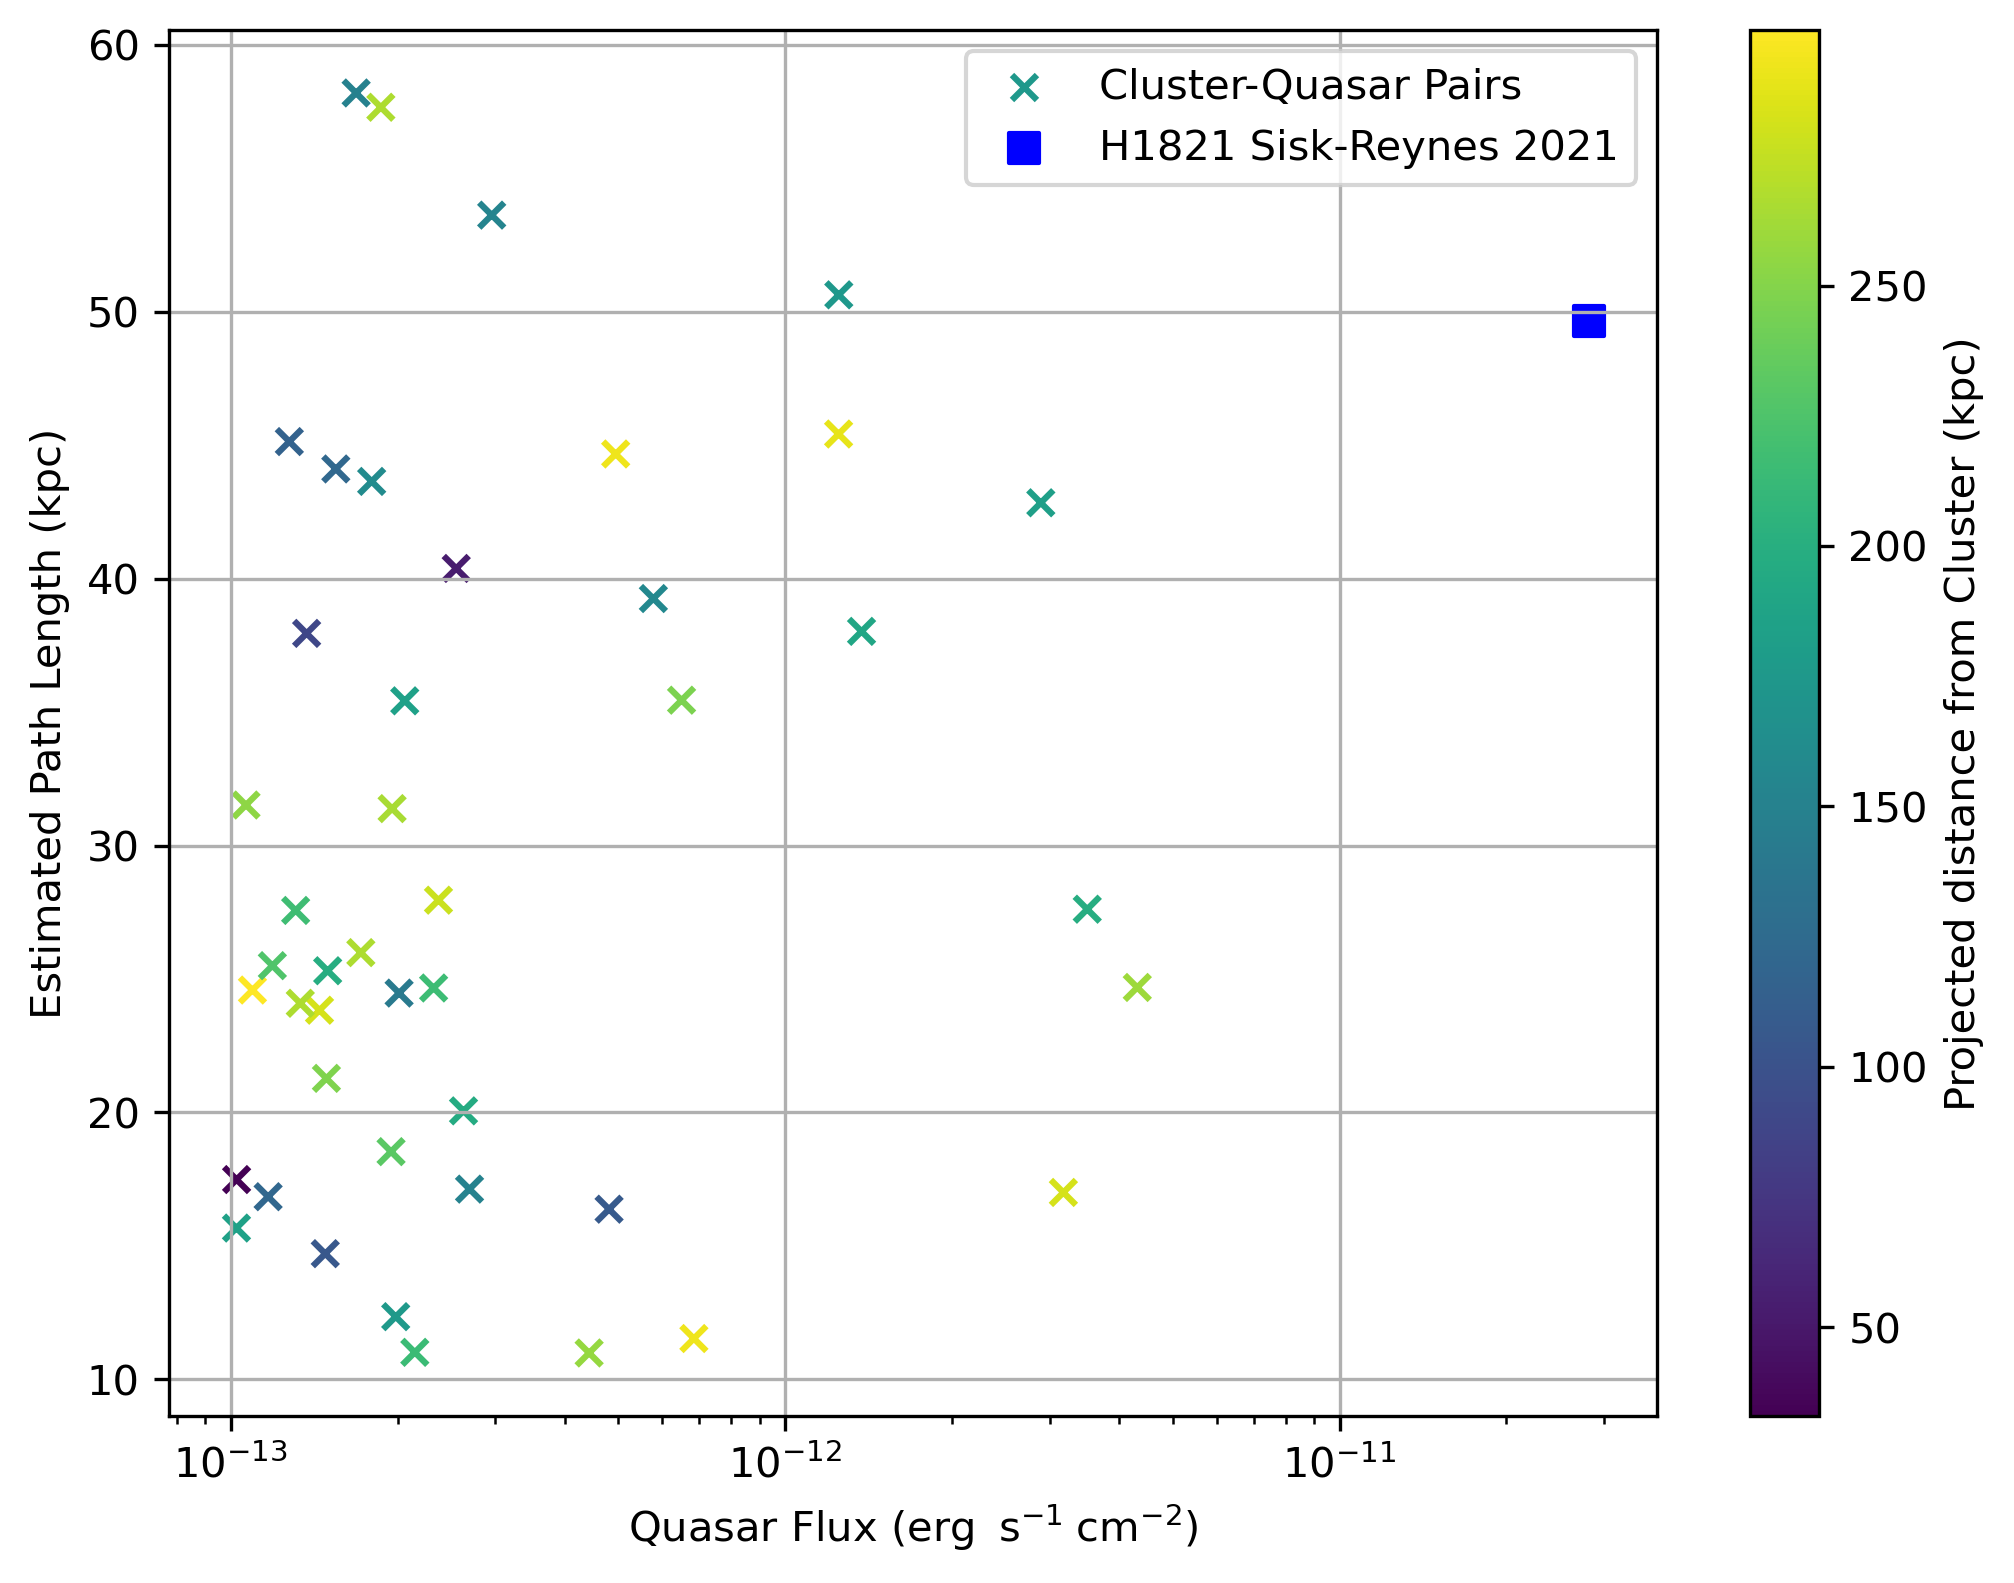

In [72]:
plt.figure(dpi = 300, figsize = (8,6))

plt.scatter(quasars_matched["ML_FLUX_1"], quasars_matched["PATH_LEN"], marker='x', c=quasars_matched["SEPARATION_R"], label="Cluster-Quasar Pairs")
plt.colorbar(label="Projected distance from Cluster (kpc)")

plt.scatter(2.82e-11, example_path_length, marker=',', s=50, c='b', label="H1821 Sisk-Reynes 2021")

plt.xscale("log")
# plt.yscale('log')
plt.grid()

plt.ylabel("Estimated Path Length (kpc)")
plt.xlabel(r"Quasar Flux ($\rm{erg} \;\; \rm{s}^{-1} \; \rm{cm}^{-2}$)")
plt.legend()

plt.show()